### Import the Libraries

In [16]:
from collections import Counter
from osgeo import gdal

import os

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import rioxarray as rxr
import earthpy as et
import pandas as pd
import rasterio as rt

# set this so the graphs open internally
%matplotlib inline

### Import the DSM and DTM

In [2]:
DSM = "data\DSM_07\DSM_07.tif"
DTM = "data\DTM_07\DTM_07.tif"

### Open the DSM file

In [4]:
dsm = rt.open(DSM)
dsm_array = dsm.read(1) #reading the 1st band
dsm_array

array([[-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.695e+01,  1.692e+01,
         1.684e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.688e+01,  1.696e+01,
         1.688e+01],
       [-9.999e+03, -9.999e+03, -9.999e+03, ...,  1.694e+01,  1.690e+01,
         1.685e+01],
       ...,
       [ 4.460e+00,  4.460e+00,  4.460e+00, ...,  1.155e+01,  1.151e+01,
         1.150e+01],
       [ 4.420e+00,  4.460e+00,  4.450e+00, ...,  1.154e+01,  1.150e+01,
         1.242e+01],
       [ 4.450e+00,  4.390e+00,  4.420e+00, ...,  1.148e+01,  1.145e+01,
         1.145e+01]], dtype=float32)

In [5]:
dsm_array.size

640000000

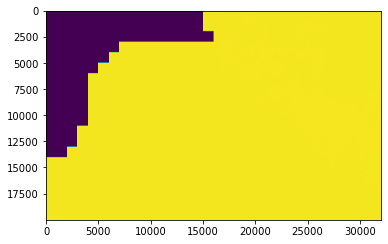

In [6]:
plt.imshow(dsm_array)

### Opening the DTM File

In [7]:
dtm = rt.open(DTM)

In [8]:
dtm_array = dtm.read(1) #reading the Band 1

In [9]:
dtm_array.size

640000000

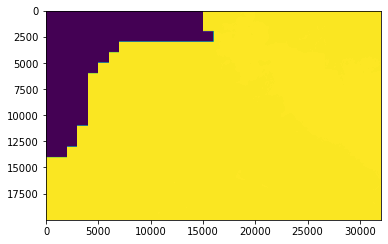

In [10]:
plt.imshow(dtm_array)

### Getting the CHM

In [11]:
#Canope Height Model = DSM - DTM
chm = dsm_array - dtm_array 
chm

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.01000023, -0.03000069],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.04999924,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.02000046,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.94000053],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

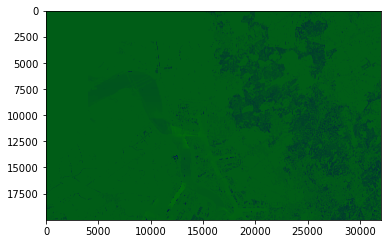

In [12]:
plt.imshow(chm, cmap='ocean')
plt.show()

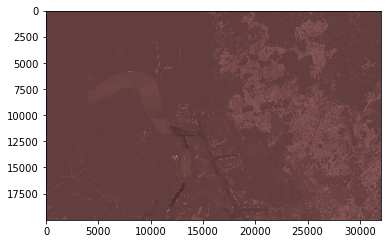

In [19]:
plt.imshow(chm, cmap='pink')
plt.show()

In [20]:
51.22767327552639, 4.420237254020624

(51.22767327552639, 4.420237254020624)

In [22]:
chm.size

640000000

### Importing the Shape File

In [ ]:
import shapefile



### CODE FROM THE LINK

In [ ]:
# Open lidar dtm
lidar_dtm_xr = rxr.open_rasterio(DTM, masked=True).squeeze()
lidar_dtm_xr

In [ ]:
# Open lidar dsm
lidar_dsm_xr = rxr.open_rasterio(DSM, masked=True).squeeze()
lidar_dsm_xr

In [ ]:
# Are the bounds the same?
print("Is the spatial extent the same?",
      lidar_dtm_xr.rio.bounds() == lidar_dsm_xr.rio.bounds())

# Is the resolution the same ??
print("Is the resolution the same?",
      lidar_dtm_xr.rio.resolution() == lidar_dsm_xr.rio.resolution())

In [ ]:
# Calculate canopy height model
lidar_chm_xr = lidar_dsm_xr - lidar_dtm_xr
lidar_chm_xr

In [ ]:
# Plot the data
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_xr.plot(cmap="Greens")
ax.set(title="Canopy Height Model for Antwerp")
ax.set_axis_off()
plt.show()

In [ ]:
lidar_chm_xr.plot.hist()
plt.show()